In [ ]:
#This code presents the results, including intersection analysis, comparison of Hits@K metrics, and both raw and filtered results.

In [ ]:
# Intersection analysis using Venn diagrams
import json
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# List of JSON files for different models
# file_names = ["rotate_DDI_reorder.json", "biobert_DDI_text2id.json", "LLM_DDI.json"]  # Heterogeneous models
file_names = ["originbert_DDI_text2id.json", "biobert_DDI_text2id.json", "pubmedbert_DDI_text2id.json"]  # Similar models

# HIT@K thresholds
hit_thresholds = [1, 3, 10]

# Function to extract the set of correct predictions for a given HIT@K threshold
def get_correct_sets(file_names, hit_threshold):
    correct_sets = []
    for file_name in file_names:
        with open(file_name, "r") as f:
            data = json.load(f)
        
        # Collect triples where the prediction rank is within the threshold
        correct_set = set(
            (str(entry["head"]), str(entry["relation"]), str(entry["tail"]))
            for entry in data if entry["rank"] <= hit_threshold
        )
        correct_sets.append(correct_set)
    return correct_sets

# Create subplots for each HIT@K
fig, axes = plt.subplots(1, len(hit_thresholds), figsize=(18, 6))

# Plot a Venn diagram for each HIT threshold
for i, hit_threshold in enumerate(hit_thresholds):
    # Get the correct prediction sets
    set1, set2, set3 = get_correct_sets(file_names, hit_threshold)
    
    # Plot Venn diagram on the ith subplot
    plt.sca(axes[i])
    venn = venn3(
        [set1, set2, set3],
        ("BERT Correct", "BioBERT Correct", "PubMedBERT Correct")
    )
    
    # Set font size for all labels
    for text in venn.set_labels + venn.subset_labels:
        if text is not None:
            text.set_fontsize(12)
    
    # Title and styling
    plt.title(f"HIT@{hit_threshold} Venn Diagram", fontsize=16, pad=20)
    plt.gca().set_facecolor('white')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

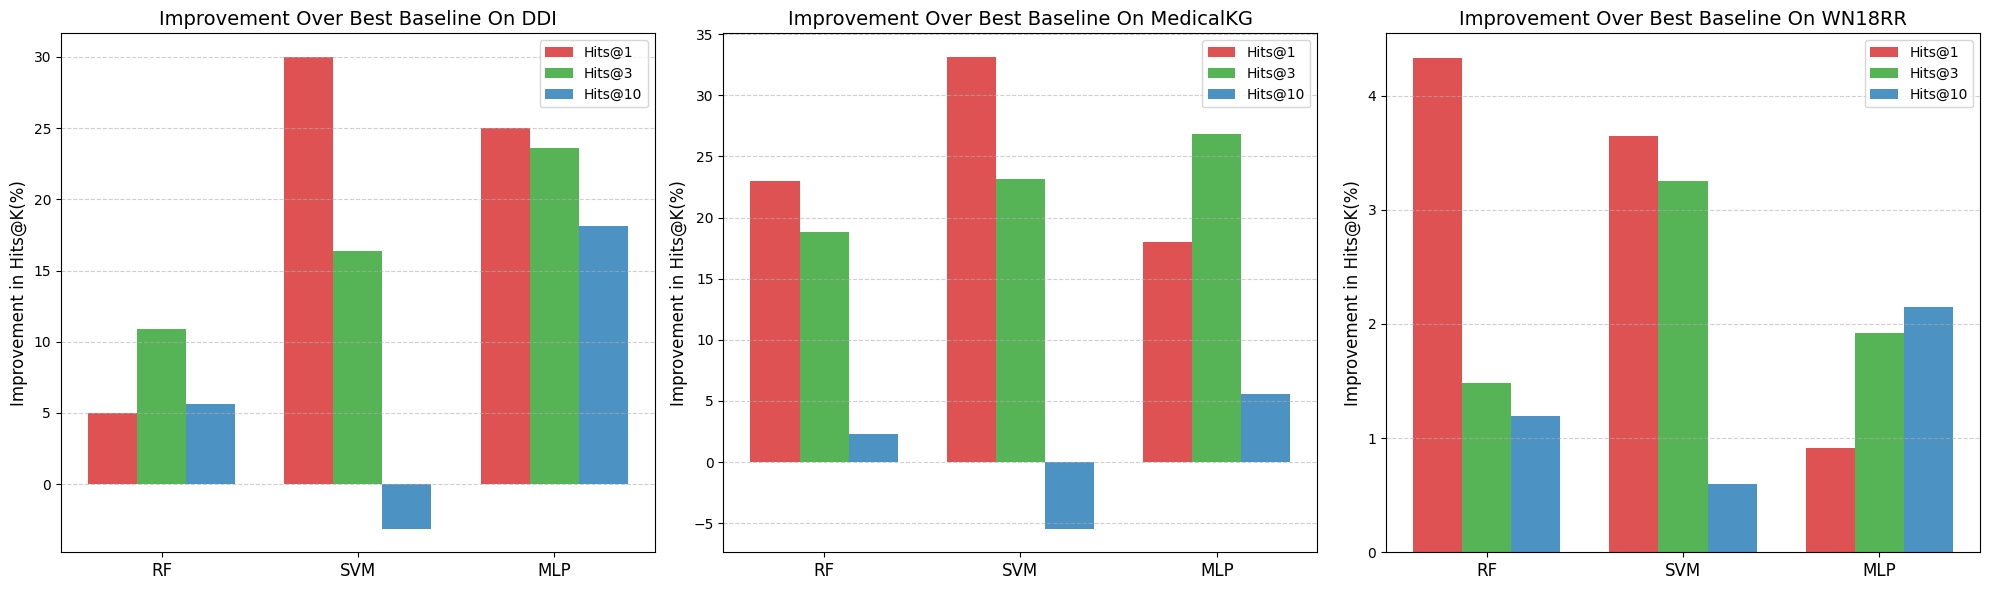

In [ ]:
# Visualization for Improvements in Hits@K
import numpy as np
import matplotlib.pyplot as plt

# List of all models
methods = ['TransE', 'DistMult', 'RotatE', 'BERT', 'BioBERT', 'PubMedBERT',
           'GLM2', 'GLM4', 'Llama3', 'RF', 'SVM', 'MLP']

# Fusion models subset and their indices
fusion_models = ['RF', 'SVM', 'MLP']
fusion_indices = [methods.index(m) for m in fusion_models]

# Datasets with Hits@1, Hits@3, Hits@10 scores
datasets = {
    'DDI': {
        'Hits1': np.array([0.010, 0.009, 0.020, 0.014, 0.016, 0.016, 0.018, 0.019, 0.015, 0.021, 0.026, 0.025]),
        'Hits3': np.array([0.044, 0.026, 0.055, 0.042, 0.046, 0.047, 0.050, 0.055, 0.045, 0.061, 0.064, 0.068]),
        'Hits10': np.array([0.142, 0.088, 0.160, 0.132, 0.138, 0.138, 0.148, 0.158, 0.146, 0.169, 0.155, 0.189])
    },
    'MedicalKG': {
        'Hits1': np.array([0.001, 0.015, 0.001, 0.178, 0.169, 0.138, 0.111, 0.173, 0.095, 0.219, 0.237, 0.210]),
        'Hits3': np.array([0.060, 0.099, 0.074, 0.410, 0.414, 0.372, 0.244, 0.301, 0.208, 0.492, 0.510, 0.525]),
        'Hits10': np.array([0.691, 0.454, 0.752, 0.659, 0.640, 0.647, 0.584, 0.613, 0.558, 0.769, 0.711, 0.794])
    },
    'WN18RR': {
        'Hits1': np.array([0.015, 0.180, 0.203, 0.439, 0.420, 0.426, 0.196, 0.255, 0.198, 0.458, 0.455, 0.443]),
        'Hits3': np.array([0.275, 0.355, 0.423, 0.676, 0.673, 0.675, 0.304, 0.337, 0.306, 0.686, 0.698, 0.689]),
        'Hits10': np.array([0.543, 0.510, 0.582, 0.831, 0.834, 0.837, 0.478, 0.484, 0.500, 0.847, 0.842, 0.855])
    }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

colors = [
    (214/255, 39/255, 40/255, 0.8),   # Red-ish for Hits@1
    (44/255, 160/255, 44/255, 0.8),   # Green-ish for Hits@3
    (31/255, 119/255, 180/255, 0.8)   # Blue-ish for Hits@10
]

for ax, (dataset_name, scores) in zip(axes, datasets.items()):
    Hits1 = scores['Hits1']
    Hits3 = scores['Hits3']
    Hits10 = scores['Hits10']

    # Extract fusion model scores
    fusion_Hits1 = Hits1[fusion_indices]
    fusion_Hits3 = Hits3[fusion_indices]
    fusion_Hits10 = Hits10[fusion_indices]

    # Best baseline (first 9 models)
    baseline_max_Hits1 = np.max(Hits1[:9])
    baseline_max_Hits3 = np.max(Hits3[:9])
    baseline_max_Hits10 = np.max(Hits10[:9])

    # Calculate relative improvements (%)
    improve_Hits1 = (fusion_Hits1 - baseline_max_Hits1) / baseline_max_Hits1 * 100
    improve_Hits3 = (fusion_Hits3 - baseline_max_Hits3) / baseline_max_Hits3 * 100
    improve_Hits10 = (fusion_Hits10 - baseline_max_Hits10) / baseline_max_Hits10 * 100

    x = np.arange(len(fusion_models))
    width = 0.25

    ax.bar(x - width, improve_Hits1, width, label='Hits@1', color=colors[0])
    ax.bar(x, improve_Hits3, width, label='Hits@3', color=colors[1])
    ax.bar(x + width, improve_Hits10, width, label='Hits@10', color=colors[2])

    ax.set_xticks(x)
    ax.set_xticklabels(fusion_models, fontsize=12)
    ax.set_ylabel('Improvement in Hits@K (%)', fontsize=12)
    ax.set_title(f'Improvement Over Best Baseline on {dataset_name}', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.legend()

plt.tight_layout()
plt.show()

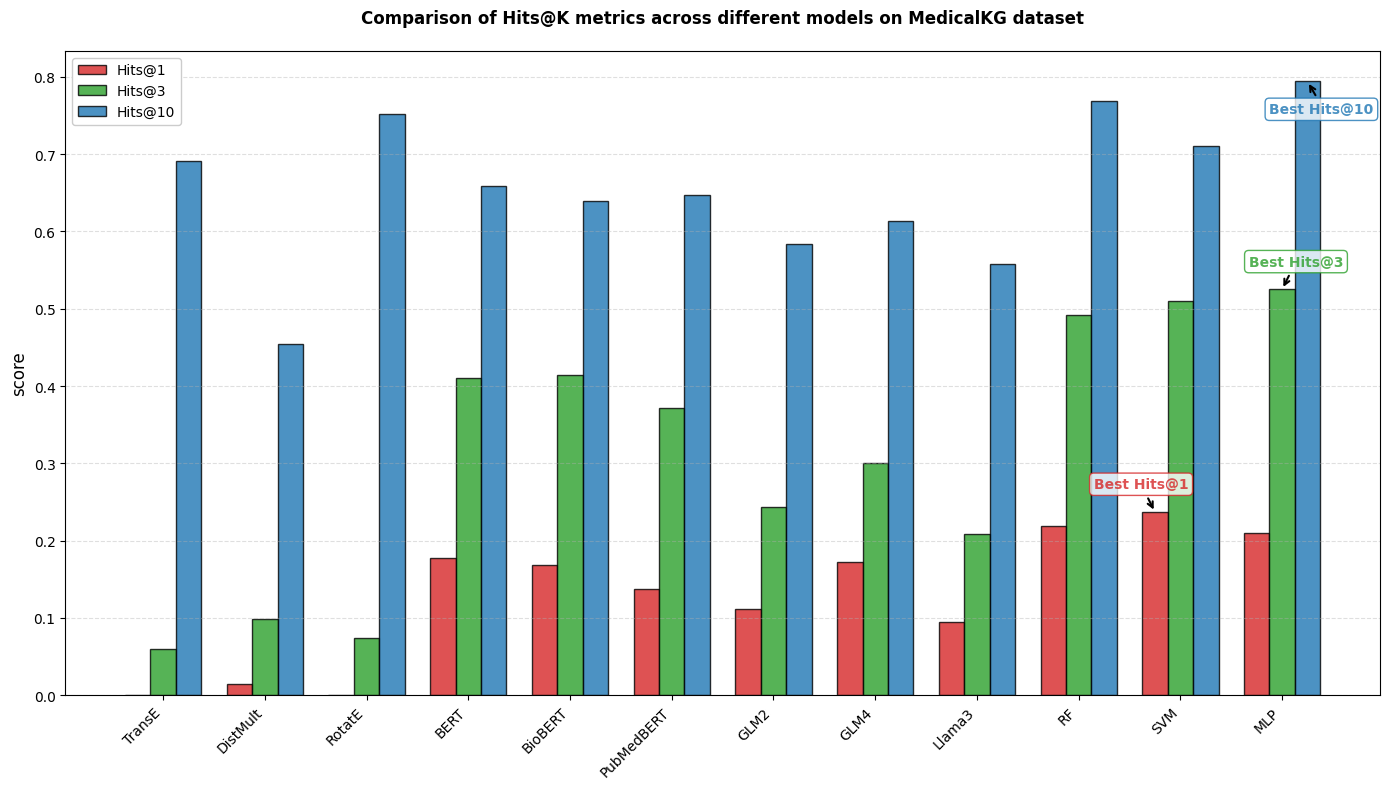

In [ ]:
# Comparison of Hits@K metrics across different models on MedicalKG dataset
import numpy as np
import matplotlib.pyplot as plt

methods = ['TransE', 'DistMult', 'RotatE', 'BERT', 'BioBERT', 'PubMedBERT', 
           'GLM2', 'GLM4', 'Llama3', 'RF', 'SVM', 'MLP']

Hits1 = np.array([0.001, 0.015, 0.001, 0.178, 0.169, 0.138, 0.111, 0.173, 0.095, 0.219, 0.237, 0.210])
Hits3 = np.array([0.060, 0.099, 0.074, 0.410, 0.414, 0.372, 0.244, 0.301, 0.208, 0.492, 0.510, 0.525])
Hits10 = np.array([0.691, 0.454, 0.752, 0.659, 0.640, 0.647, 0.584, 0.613, 0.558, 0.769, 0.711, 0.794])

colors = {
    'Hits@1': (214/255, 39/255, 40/255, 0.8),
    'Hits@3': (44/255, 160/255, 44/255, 0.8),
    'Hits@10': (31/255, 119/255, 180/255, 0.8)
}

bar_width = 0.25
x = np.arange(len(methods))

plt.figure(figsize=(14, 8))
bars1 = plt.bar(x - bar_width, Hits1, width=bar_width, label='Hits@1', color=colors['Hits@1'], edgecolor='k', alpha=0.8)
bars2 = plt.bar(x, Hits3, width=bar_width, label='Hits@3', color=colors['Hits@3'], edgecolor='k', alpha=0.8)
bars3 = plt.bar(x + bar_width, Hits10, width=bar_width, label='Hits@10', color=colors['Hits@10'], edgecolor='k', alpha=0.8)

plt.title('Comparison of Hits@K metrics across different models on MedicalKG dataset', fontweight='bold', pad=20)
plt.ylabel('Score', fontsize=12)
plt.xticks(x, methods, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(ncol=1, loc='upper left', framealpha=1)
plt.tight_layout()

def annotate_best(ax, values, offset, color, label, is_hits10=False):
    best_idx = np.argmax(values)
    x_pos = best_idx + offset * bar_width
    y_pos = values[best_idx]
    
    # 设置文本偏移和箭头样式
    xytext_offset = (10, -15) if is_hits10 else (10 if offset >= 0 else -10, 15)
    arrowprops = dict(arrowstyle='->', color='black', lw=1.5)
    if is_hits10:
        arrowprops['connectionstyle'] = "angle,angleA=0,angleB=-60,rad=10"
    
    ax.annotate(f'Best {label}',
                xy=(x_pos, y_pos),
                xytext=xytext_offset, textcoords='offset points',
                ha='center', va='top' if is_hits10 else 'bottom', fontweight='bold', color=color,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor=color, facecolor="white", alpha=0.8),
                arrowprops=arrowprops)

annotate_best(plt.gca(), Hits1, -1, colors['Hits@1'], 'Hits@1')
annotate_best(plt.gca(), Hits3, 0, colors['Hits@3'], 'Hits@3')
annotate_best(plt.gca(), Hits10, 1, colors['Hits@10'], 'Hits@10', is_hits10=True)

plt.savefig('MedicalKG_Hits_comparison_with_best_annotations.png', dpi=600, bbox_inches='tight')
plt.show()



In [ ]:
# Calculate raw and filtered evaluation metrics for knowledge graph completion
import json

# Load prediction results
with open("rotate_DDI_reorder.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Load training triples and store as a set of (head, relation, tail)
train_set = set()
with open("train2id.txt", "r", encoding="utf-8") as f:
    for line in f:
        head, tail, relation = map(int, line.strip().split())
        train_set.add((head, relation, tail))

# Initialize raw metrics
hit1, hit3, hit10, mr, mrr = 0, 0, 0, 0, 0

# Initialize filtered metrics
hit1_f, hit3_f, hit10_f, mr_f, mrr_f = 0, 0, 0, 0, 0

for entry in data:
    head = int(entry["head"])
    relation = int(entry["relation"])
    tail = int(entry["tail"])

    # Parse topk_score_info and sort by score (ascending)
    topk_score_info = json.loads(entry["topk_score_info"])
    sorted_tails = sorted(topk_score_info, key=topk_score_info.get)  # LLM-style: lower score is better

    # Compute raw rank
    rank = sorted_tails.index(str(tail)) + 1  # Rank is 1-based
    if rank <= 1:
        hit1 += 1
    if rank <= 3:
        hit3 += 1
    if rank <= 10:
        hit10 += 1
    mr += rank
    mrr += 1.0 / rank

    # Compute filtered rank (excluding seen triples from training set)
    filtered_tails = [
        t for t in sorted_tails
        if (head, relation, int(t)) not in train_set
    ]
    if str(tail) in filtered_tails:
        new_rank = filtered_tails.index(str(tail)) + 1
        if new_rank <= 1:
            hit1_f += 1
        if new_rank <= 3:
            hit3_f += 1
        if new_rank <= 10:
            hit10_f += 1
        mr_f += new_rank
        mrr_f += 1.0 / new_rank

# Final evaluation
total = len(data)
print(f"Raw Evaluation:     MR={mr / total:.2f}, MRR={mrr / total:.4f}, Hit@1={hit1 / total:.4f}, Hit@3={hit3 / total:.4f}, Hit@10={hit10 / total:.4f}")
print(f"Filtered Evaluation: MR={mr_f / total:.2f}, MRR={mrr_f / total:.4f}, Hit@1={hit1_f / total:.4f}, Hit@3={hit3_f / total:.4f}, Hit@10={hit10_f / total:.4f}")